"파이썬 딥러닝 텐서플로우\" 교재 중  
"part 04 합성곱 신경망(CNN) 06 객체 탐지
"에 대한 코드 정리

1. 텐서플로우 허브 활용(라이브러리 불러오기)

In [1]:
import tensorflow as tf #tensorflow
import tensorflow_hub as tfhub #tensorflow_hub

3121152/3111378 [==============================] - 1s 0us/step


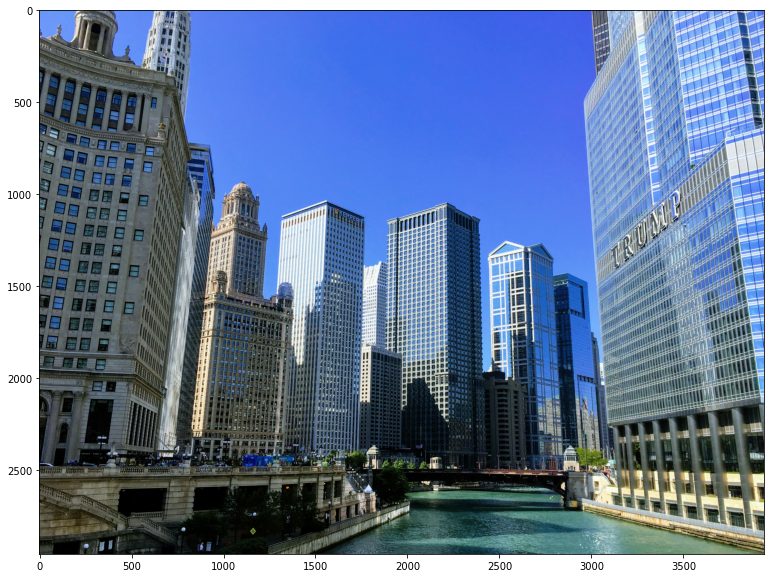

In [2]:
#샘플이미지 준비
#학습이 완료된 모델을 사용하는 것이므로 별도의 모델 훈련은 필요하지 않다.

img_path = 'https://t1.daumcdn.net/cfile/tistory/993F32435B2262B631'

img = tf.keras.utils.get_file(fname='chicago', origin=img_path)
img = tf.io.read_file(img) #이미지 파일 객체를 string으로 변환
img = tf.image.decode_jpeg(img, channels=3) #string -> unit8(숫자 텐서)로 변환
img = tf.image.convert_image_dtype(img, tf.float32) #0~1 범위로 정규화

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(img)

In [3]:
#사전학습 모델 : 4차원 텐서를 입력 받는다. 불러온 이미지는 3차원이므로 새로운 축을 하나 추가해준다.(앞쪽 axis=0)
img_input = tf.expand_dims(img,0)
img_input.shape

TensorShape([1, 2955, 3940, 3])

In [4]:
#사용할 모델의 링크를 가져와 load 함수에 넣어 모델을 불러온다.

model = tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
#모델 시그니처 확인
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F99D009DE50>}))

In [6]:
#시그니처 키를 이용해 object detection 모델 인스턴스를 만든다.
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7F99D009DE50>

In [7]:
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_boxes', 'detection_class_labels', 'detection_class_names', 'detection_class_entities', 'detection_scores'])

In [8]:
len(result["detection_scores"]) #100개의 객체가 탐지됨

100

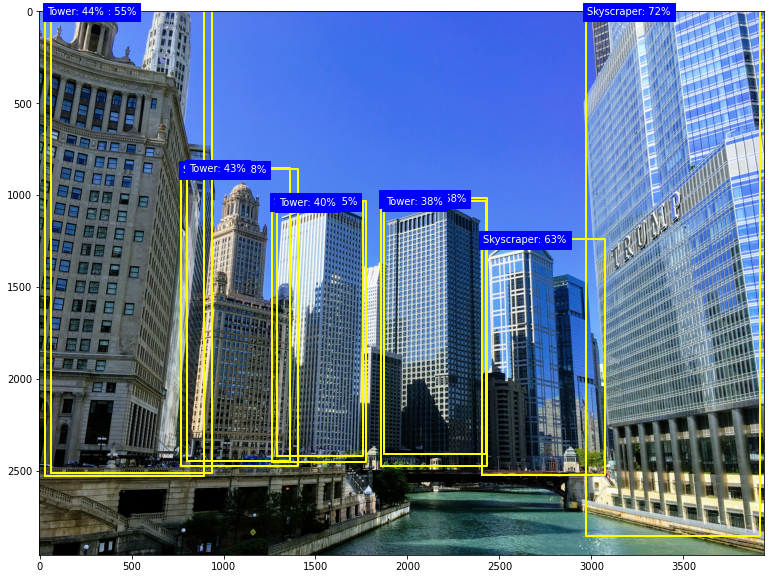

In [11]:
#객체 탐지 결과 시각화
boxes = result["detection_boxes"]
labels = result["detection_class_entities"]
scores = result["detection_scores"] #신뢰도

#샘플 이미지 크기
img_height, img_width = img.shape[0], img.shape[1]

#탐지할 최대 객체 수
obj_to_detect = 10

#시각화
plt.figure(figsize=(15,10))
for i in range(min(obj_to_detect, boxes.shape[0])):
  if scores[i] >= 0.2:
    (ymax, xmin, ymin, xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                boxes[i][2] * img_height, boxes[i][3] * img_width,)
    
    plt.imshow(img)
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],
             color='yellow', linewidth=2)
    
    class_name = labels[i].numpy().decode('utf-8')
    infer_score = int(scores[i].numpy() * 100)
    annotation = "{}: {}%".format(class_name, infer_score)
    plt.text(xmin+10, ymax+20, annotation, color='white', backgroundcolor='blue', fontsize=10)